<a id="start"></a>
# __Pymaceuticals Drug Analysis__
### Justin Stubbs
[Report](#end)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import pandas as pd

In [2]:
# Import raw data
clinicaltrial_master = pd.read_csv("data/clinicaltrial_data.csv")
mousedrug_master = pd.read_csv("data/mouse_drug_data.csv")

# Combine into single dataframe
trial_data = clinicaltrial_master.merge(mousedrug_master, how='left', on='Mouse ID')
trial_data['Tumor Volume (mm3)'] = trial_data['Tumor Volume (mm3)'].astype('float')
trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [3]:
grouped_trial_data = trial_data.groupby(['Drug', 'Timepoint'])
mean_tumor_vol = pd.DataFrame(grouped_trial_data['Tumor Volume (mm3)'].mean())
times = mean_tumor_vol.index.levels[1].tolist()

In [4]:
sem_tumor_vol = pd.DataFrame(grouped_trial_data['Tumor Volume (mm3)'].sem())

<a id="fig1"></a>

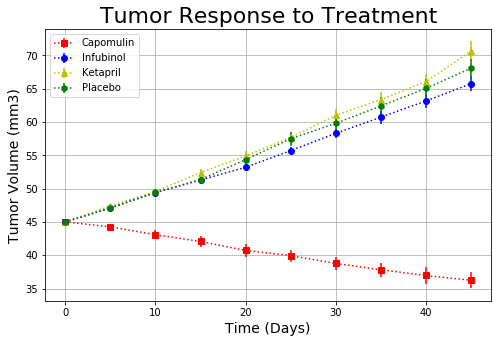

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.errorbar(times, mean_tumor_vol.loc['Capomulin']['Tumor Volume (mm3)'],
            sem_tumor_vol.loc['Capomulin']['Tumor Volume (mm3)'], fmt=':sr', label='Capomulin')
ax.errorbar(times, mean_tumor_vol.loc['Infubinol']['Tumor Volume (mm3)'],
            sem_tumor_vol.loc['Infubinol']['Tumor Volume (mm3)'], fmt=':ob', label='Infubinol')
ax.errorbar(times, mean_tumor_vol.loc['Ketapril']['Tumor Volume (mm3)'],
            sem_tumor_vol.loc['Ketapril']['Tumor Volume (mm3)'], fmt=':^y', label='Ketapril')
ax.errorbar(times, mean_tumor_vol.loc['Placebo']['Tumor Volume (mm3)'],
            sem_tumor_vol.loc['Placebo']['Tumor Volume (mm3)'], fmt=':hg', label='Placebo')
ax.set_xlabel("Time (Days)", fontsize=14)
ax.set_ylabel("Tumor Volume (mm3)", fontsize=14)
ax.set_title("Tumor Response to Treatment", fontsize=22)
plt.grid(which='major', axis='both')
plt.legend()
plt.show()

[Report](#end)

In [6]:
mean_metastatic = pd.DataFrame(grouped_trial_data['Metastatic Sites'].mean())

In [7]:
sem_metastatic = pd.DataFrame(grouped_trial_data['Metastatic Sites'].sem())

<a id="fig2"></a>

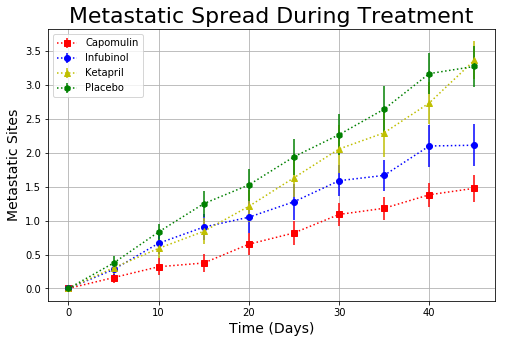

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.errorbar(times, mean_metastatic.loc['Capomulin']['Metastatic Sites'],
            sem_metastatic.loc['Capomulin']['Metastatic Sites'], fmt=':sr', label='Capomulin')
ax.errorbar(times, mean_metastatic.loc['Infubinol']['Metastatic Sites'],
            sem_metastatic.loc['Infubinol']['Metastatic Sites'], fmt=':ob', label='Infubinol')
ax.errorbar(times, mean_metastatic.loc['Ketapril']['Metastatic Sites'],
            sem_metastatic.loc['Ketapril']['Metastatic Sites'], fmt=':^y', label='Ketapril')
ax.errorbar(times, mean_metastatic.loc['Placebo']['Metastatic Sites'],
            sem_metastatic.loc['Placebo']['Metastatic Sites'], fmt=':hg', label='Placebo')
ax.set_xlabel("Time (Days)", fontsize=14)
ax.set_ylabel("Metastatic Sites", fontsize=14)
ax.set_title("Metastatic Spread During Treatment", fontsize=22)
plt.grid(which='major', axis='both')
plt.legend()
plt.show()

[Report](#end)

In [9]:
survival = pd.DataFrame(grouped_trial_data['Metastatic Sites'].count()/25*100)

<a id="fig3"></a>

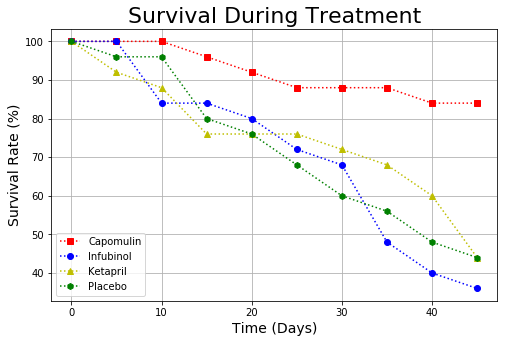

In [10]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(times, survival.loc['Capomulin']['Metastatic Sites'], ':sr', label='Capomulin')
ax.plot(times, survival.loc['Infubinol']['Metastatic Sites'], ':ob', label='Infubinol')
ax.plot(times, survival.loc['Ketapril']['Metastatic Sites'], ':^y', label='Ketapril')
ax.plot(times, survival.loc['Placebo']['Metastatic Sites'], ':hg', label='Placebo')
ax.set_xlabel("Time (Days)", fontsize=14)
ax.set_ylabel("Survival Rate (%)", fontsize=14)
ax.set_title("Survival During Treatment", fontsize=22)
plt.grid(which='major', axis='both')
plt.legend()
plt.show()

[Report](#end)

In [11]:
total_tumor_vol = pd.DataFrame(grouped_trial_data['Tumor Volume (mm3)'].mean())
drugs = []
change = []
trial = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
for i in total_tumor_vol.index.levels[0].tolist():
    j = 'Tumor Volume (mm3)'
    if i in trial:
        drugs.append(i)
        change.append(100 * (total_tumor_vol.loc[i][j][45] - total_tumor_vol.loc[i][j][0]) / total_tumor_vol.loc[i][j][0])
        
colors = ['g' if x < 0 else 'r' for x in change]
height = [-7 if x < 0 else 5 for x in change]

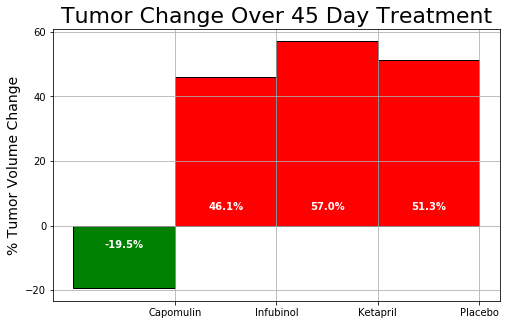

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.grid(which='major', axis='both')

ax.bar(drugs, change, color=colors, width=-1, align='edge', edgecolor='k')
ax.set_title("Tumor Change Over 45 Day Treatment", fontsize=22)
ax.set_ylabel("% Tumor Volume Change", fontsize=14)
ax.set_yticks([-20, 0, 20, 40, 60])

for i in range(len(change)):
    plt.text(-0.5 + i, height[i], str(round(change[i], 1)) + '%', color='white', ha='center', fontweight='bold')

plt.show()

<a id="end"></a>
# __Results and Conclusion__

After analyzing the results of the drug trial, it is clear that Capomulin is the best candidate to move on for further FDA approvals. Not only was it the only drug to reduce overall tumor size ([Figure 1](#fig1)), it also slowed metastatic spread the most ([Figure 2](#fig2)) and had the highest survival rate for patients ([Figure 3](#fig3)).

[Return to Top](#start)